### Homework IV: API's and Webscraping

In [ ]:
# install wbgapi
# !pip install wbgapi

# install PRAW
# %pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from IPython.display import display, HTML
import wbgapi as wb
import praw

#### Question 1

Using the LastFM API, look up your five favorite artists (using [here](https://www.last.fm/api/show/artist.getTopAlbums)) top albums and create a DataFrame of your results formatted as shown below:

| Artist | Album | Album Art Link |
| ------ | ------ | ------------  |
| Riff Raff | Pink Panther | www.lastfm.com/panther |
| Slayer | South of Heaven | www.lastfm.com/slay |

In [ ]:
# Laufey: https://www.last.fm/music/Laufey
# Taylor Swift: https://www.last.fm/music/Taylor+Swift
# Michael Jackson: https://www.fm/music/Michael+Jackson
# Billie Eilish: https://www.last.fm/music/Billie+Eilish
# Ariana Grande: https://www.last.fm/music/Ariana+Grande

# API Key: a5e1f01e6a95f73d09f645f30fee07d3 (https://www.last.fm/api/account/create)

# create a variable for the API key
API_KEY = 'a5e1f01e6a95f73d09f645f30fee07d3'
BASE_URL = 'http://ws.audioscrobbler.com/2.0/'

# create a list for my favorite artists
fav_artists = ['Laufey', 'Taylor Swift', 'Michael Jackson', 'Billie Eilish', 'Ariana Grande']

# create an empty list to hold the data for the albums
albums_data = []

# use a for loop to go through the favorite artists and find the top albums
for artist in fav_artists:
    # create a dictionary for the parameters
    params = {
        'method': 'artist.getTopAlbums',
        'artist': artist,
        'api_key': API_KEY,
        'format': 'json',
        'limit': 1 # get only one album
    }

    # request the API
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    # get album data if available
    if 'topalbums' in data and 'album' in data['topalbums'] and data['topalbums']['album']:
        album = data['topalbums']['album'][0] # index [0] for the first album (top album)
        album_name = album['name']
        artist_name = album['artist']['name']

        # get the image URL
        image_url = ''
        if 'image' in album:
          image_url = next((img['#text'] for img in album['image'] if img['size'] == 'extralarge'), '')
          if not image_url:
            image_url = album['image'][-1]['#text']

        # create a clickable link for the album art
        clickable_link = f'<a href="{image_url}" target="_blank">www.lastfm.com/{album_name}</a>' if image_url else 'N/A'

        # put all the data into the list
        albums_data.append({'Artist': artist_name, 'Album': album_name, 'Album Art Link': clickable_link})

# create a DataFrame for the artists and their top albums
artist_df = pd.DataFrame(albums_data, columns=['Artist', 'Album', 'Album Art Link'])

# show the DataFrame
display(HTML(artist_df.to_html(escape=False, index=False)))

Artist,Album,Album Art Link
Laufey,Bewitched,www.lastfm.com/Bewitched
Taylor Swift,Lover,www.lastfm.com/Lover
Michael Jackson,Thriller,www.lastfm.com/Thriller
Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?","www.lastfm.com/WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?"
Ariana Grande,Dangerous Woman,www.lastfm.com/Dangerous Woman


In [ ]:
# CREATE A SECOND VERSION WHERE THE ALBUM COVER IS CLICKABLE

# create a list for my favorite artists
fav_artists2 = ['Laufey', 'Taylor Swift', 'Michael Jackson', 'Billie Eilish', 'Ariana Grande']

# create an empty list to hold the data for the albums
albums_data2 = []

# use a for loop to go through the favorite artists and find the top albums
for artist2 in fav_artists2:
    # create a dictionary for the parameters
    params = {
        'method': 'artist.getTopAlbums',
        'artist': artist2,
        'api_key': API_KEY,
        'format': 'json',
        'limit': 1 # get only one album
    }

    # request the API
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    # get album data if available
    if 'topalbums' in data and 'album' in data['topalbums'] and data['topalbums']['album']:
        album2 = data['topalbums']['album'][0] # index [0] for the first album (top album)
        album_name2 = album2['name']
        artist_name2 = album2['artist']['name']

        # get the image URL
        image_url = ''
        if 'image' in album2:
          # Try to get 'extralarge' size first, then the last image if 'extralarge' is not available
          image_url = next((img['#text'] for img in album2['image'] if img['size'] == 'extralarge' and img['#text']), '')
          if not image_url:
            image_url = next((img['#text'] for img in reversed(album2['image']) if img['#text']), '')

        # create a clickable link with the album art as the clickable element
        clickable_photo = f'<a href="{image_url}" target="_blank"><img src="{image_url}" width="100"></a>' if image_url else 'N/A'

        # put all the data into the list
        albums_data2.append({'Artist': artist_name2, 'Album': album_name2, 'Album Art Link': clickable_photo})

# create a DataFrame for the artists and their top albums
artist_df2 = pd.DataFrame(albums_data2, columns=['Artist', 'Album', 'Album Art Link'])

# show the DataFrame
display(HTML(artist_df2.to_html(escape=False, index=False)))

Artist,Album,Album Art Link
Laufey,Bewitched,
Taylor Swift,Lover,
Michael Jackson,Thriller,
Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",
Ariana Grande,Dangerous Woman,


#### Question 2

Using the LastFM API, look up tracks similar (using [this](https://www.last.fm/api/show/track.getSimilar)) to Quicksand's song Fazer.  Assemble the results in a DataFrame with the format given below:

| Artist | Song | Playcount | Match % | Duration |
| ------ | ------- | ------ | ------ | ---------- |
| quicksand | can opener | 98218 | 1.0 | 219 |

In [ ]:
# API Key: a5e1f01e6a95f73d09f645f30fee07d3 (https://www.last.fm/api/account/create)

# create a variable for the API key
API_KEY = 'a5e1f01e6a95f73d09f645f30fee07d3'
BASE_URL = 'http://ws.audioscrobbler.com/2.0/'

# create a dictionary for the parameters
params = {
    'method': 'track.getSimilar',
    'artist': 'Quicksand',
    'track': 'Fazer',
    'api_key': API_KEY,
    'format': 'json',
    'limit': 10 # find ten similar songs
}

# request API
response = requests.get(BASE_URL, params=params)
data = response.json()

# create an empty list to hold the data for the similar songs
similar_songs_data = []

# for all of the similar tracks, find the individual values wanted
if 'similartracks' in data and 'track' in data['similartracks']:
    similar_tracks = data['similartracks']['track']
    for track in similar_tracks:
        artist_name = track['artist']['name']
        song_name = track['name']
        playcount = track['playcount']
        match_percent = track['match']
        duration = track['duration']

        # add the song to the list of similar songs
        similar_songs_data.append({'Artist': artist_name, 'Song': song_name, 'Playcount': playcount, 'Match %': match_percent, 'Duration': duration})

# create the DataFrame
similar_songs_df = pd.DataFrame(similar_songs_data, columns=['Artist', 'Song', 'Playcount', 'Match %', 'Duration'])

# show the DataFrame
display(HTML(similar_songs_df.to_html(escape=False, index=False)))

Artist,Song,Playcount,Match %,Duration
Quicksand,Head To Wall,213517,1.000000,187
Quicksand,Dine Alone,260421,0.911136,208
Helmet,In the Meantime,642884,0.185974,186
Helmet,Give It,270863,0.176539,0
Fugazi,Bed for the Scraping,690222,0.148322,179
At the Drive-In,One Armed Scissor,3436528,0.142846,238
Unwound,Corpse Pose,1323294,0.133252,187
At the Drive-In,Pattern Against User,2079367,0.130163,197
Glassjaw,Mu Empire,756118,0.126273,224
Refused,Summerholidays vs. Punkroutine,741360,0.124857,0


#### Question 3

arXiv is an open source space for academic papers to be published.  They have a freely accessible API [here](https://info.arxiv.org/help/api/user-manual.html#arxiv-api-users-manual).  In order to parse the responses, you will need to use the BeautifulSoup library and turn the text of the response into a soup object that is then searched.

Your objective is to write a function that takes in a search term and returns a `DataFrame` with the article date, title, authors, summary, and article url as columns of the `DataFrame`.

In [ ]:
# write a function (search_term) -> returns DataFrame (article date, title, authors, sumar, article url)
# arXiv: https://info.arxiv.org/help/api/user-manual.html#arxiv-api-users-manual

def search_arxiv(search_term):
  # build the API url
  BASE_URL = 'http://export.arxiv.org/api/query'

  # create the parameters
  params = {
      'search_query': f'all:{search_term}',
      'start': 0,
      'max_results': 10, # can only show up to 10 results
      'sortBy': 'lastUpdatedDate',
      'sortOrder': 'descending'
  }

  # request the API
  response = requests.get(BASE_URL, params=params)

  # use BeautifulSoup to parse the responses
  soup = BeautifulSoup(response.text, 'xml')
  articles = soup.find_all('entry')

  # create an empty list to hold the data for the articles
  articles_data = []

  # find the data in the articles
  for article in articles:
    # find the individual values wanted
    article_date = article.find('updated').text
    article_title = article.find('title').text
    article_authors = ', '.join([author.text for author in article.find_all('name')])
    article_summary = article.find('summary').text
    article_url = article.find('id').text

    # create a clickable link for the article using the article title as the link text
    clickable_link = f'<a href="{article_url}" target="_blank">{article_title}</a>' if article_url else 'N/A'

    # add the article to the list of articles
    articles_data.append({'Date': article_date, 'Title': article_title, 'Authors': article_authors, 'Summary': article_summary, 'URL': clickable_link})

  # create a DataFrame
  articles_df = pd.DataFrame(articles_data, columns=['Date', 'Title', 'Authors', 'Summary', 'URL'])

  # display
  display(HTML(articles_df.to_html(escape=False, index=False)))

  return

In [ ]:
# using the search_arXiv function
search_term = 'food'
search_arxiv(search_term)

Date,Title,Authors,Summary,URL
2025-10-15T11:53:01Z,Near-Infrared Hyperspectral Imaging Applications in Food Analysis --\n Improving Algorithms and Methodologies,Ole-Christian Galbo Engstrøm,"This thesis investigates the application of near-infrared hyperspectral\nimaging (NIR-HSI) for food quality analysis. The investigation is conducted\nthrough four studies operating with five research hypotheses. For several\nanalyses, the studies compare models based on convolutional neural networks\n(CNNs) and partial least squares (PLS). Generally, joint spatio-spectral\nanalysis with CNNs outperforms spatial analysis with CNNs and spectral analysis\nwith PLS when modeling parameters where chemical and physical visual\ninformation are relevant. When modeling chemical parameters with a\n2-dimensional (2D) CNN, augmenting the CNN with an initial layer dedicated to\nperforming spectral convolution enhances its predictive performance by learning\na spectral preprocessing similar to that applied by domain experts. Still,\nPLS-based spectral modeling performs equally well for analysis of the mean\ncontent of chemical parameters in samples and is the recommended approach.\nModeling the spatial distribution of chemical parameters with NIR-HSI is\nlimited by the ability to obtain spatially resolved reference values.\nTherefore, a study used bulk mean references for chemical map generation of fat\ncontent in pork bellies. A PLS-based approach gave non-smooth chemical maps and\npixel-wise predictions outside the range of 0-100\%. Conversely, a 2D CNN\naugmented with a spectral convolution layer mitigated all issues arising with\nPLS. The final study attempted to model barley's germinative capacity by\nanalyzing NIR spectra, RGB images, and NIR-HSI images. However, the results\nwere inconclusive due to the dataset's low degree of germination. Additionally,\nthis thesis has led to the development of two open-sourced Python packages. The\nfirst facilitates fast PLS-based modeling, while the second facilitates very\nfast cross-validation of PLS and other classical machine learning models with a\nnew algorithm.\n",Near-Infrared Hyperspectral Imaging Applications in Food Analysis --\n Improving Algorithms and Methodologies
2025-10-14T11:58:01Z,Game Theory Analysis of Third-Party Regulation in Organic Supply Chains,"João Zambujal-Oliveira, André Silva, Rui Vasconcelos","As people become more conscious of their health and the environment, the\ndemand for organic food is expected to increase. However, distinguishing\norganic products from conventionally produced ones can be hard, creating a\nproblem where producers may have the incentive to label their conventional\nproducts as organic to sell them at a higher price. Game theory can help to\nanalyze the strategic interactions between producers and consumers in order to\nhelp consumers verifying these claims. Through a game theory analysis approach,\nthis paper provides evidence of the need for a third party to equalize markets\nand foster trust in organic supply chains. Therefore, government regulation,\nincluding regular and random monitoring and certification requirements, plays a\ncrucial role in achieving the desired level of trust and information exchange\namong supply chain agents, which ultimately determines the growth trajectory of\nthe sector.\n",Game Theory Analysis of Third-Party Regulation in Organic Supply Chains
2025-10-14T08:35:39Z,GTPBD: A Fine-Grained Global Terraced Parcel and Boundary Dataset,"Zhiwei Zhang, Zi Ye, Yibin Wen, Shuai Yuan, Haohuan Fu, Jianxi Huang, Juepeng Zheng","Agricultural parcels serve as basic units for conducting agricultural\npractices and applications, which is vital for land ownership registration,\nfood security assessment, soil erosion monitoring, etc. However, existing\nagriculture parcel extraction studies only focus on mid-resolution mapping or\nregular plain farmlands while lacking representation of complex terraced\nterrains due to the demands of precision 

#### Question 4

The world bank has a Python wrapper for its api called `wbgapi`.  Examine the documentation [here](https://pypi.org/project/wbgapi/) and chose an endpoint(s) to query.  Find at least two endpoints of interest and create visualizations of this data.  Write a sentence or two about what you've found.

In [ ]:
# use the world bank api (wbgapi)
# endpoints that are interesting

# options:
wb.series.info()

id,value
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2,Rural land area where elevation is below 5 meters (sq. km)


<Figure size 1000x600 with 0 Axes>

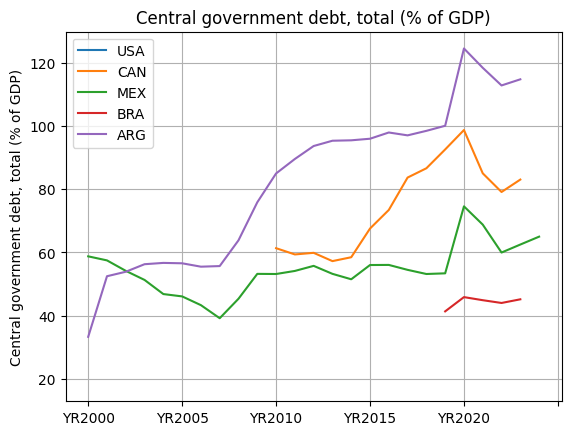

<Figure size 1000x600 with 0 Axes>

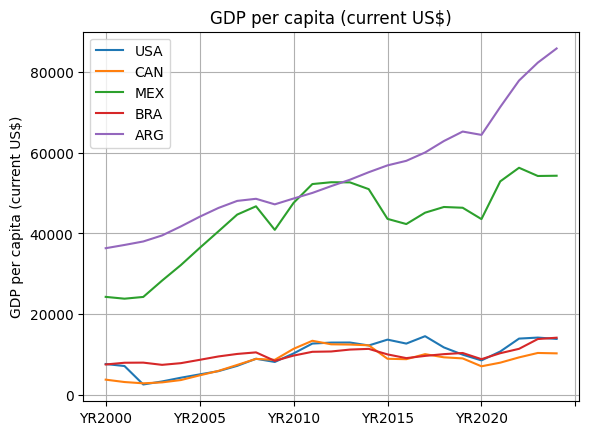

<Figure size 1000x600 with 0 Axes>

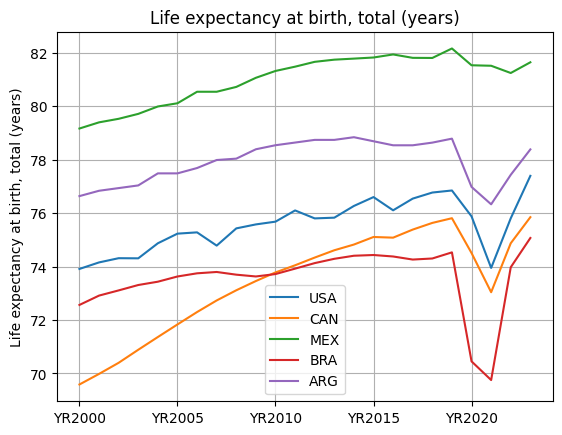

<Figure size 1000x600 with 0 Axes>

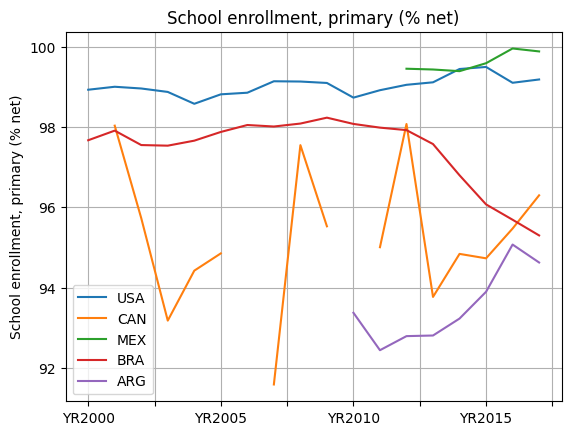

In [ ]:
# endpoint interests
# 1) GC.DOD.TOTL.GD.ZS: Central government debt, total (% of GDP)
# 2) NY.GDP.PCAP.CD: GDP per capita (current US$)
# 3) SP.DYN.LE00.IN: Life expectancy at birth, total (years)
# 4) SE.PRM.NENR: School enrollment, primary (% net)

# create a dictionary for the endpoints of interest (do four endpoints)
endpoints = {
    'GC.DOD.TOTL.GD.ZS': 'Central government debt, total (% of GDP)',
    'NY.GDP.PCAP.CD': 'GDP per capita (current US$)',
    'SP.DYN.LE00.IN': 'Life expectancy at birth, total (years)',
    'SE.PRM.NENR': 'School enrollment, primary (% net)'
}

# create a list of contries to compare
countries = ['USA', 'CAN', 'MEX', 'BRA', 'ARG']

# look at the trend from 2000 to now
years = range(2000, 2025)

# add the data to an empty dictionary
data = {}
# get the data from the endpoints
for code, name in endpoints.items():
    data_df = wb.data.DataFrame(code, economy=countries, time=years)
    data_df = data_df.T # transverse
    # find data on the countries, add into DataFrame
    data[code] = data_df

# create visualizations of this data by plotting
for code, data_df in data.items():
    plt.figure(figsize=(10, 6))
    data_df.plot(title=endpoints[code], ylabel=endpoints[code])
    plt.legend(countries)
    plt.grid(True)
    plt.show()

**What I found out (from 2000-2025):**

GC.DOD.TOTL.GD.ZS: Central Government Debt, Total (% of GDP)
* This data measures how much the country's goverment owes in terms of debt in comparison to the size of its economy
* Here, we see Argentina has an extremely volatile with many spikes in the data most likely due to recurring defaults

NY.GDP.PCAP.CD: GDP per Capita (Current US$)
* This data measures the average income per person in USD
* Here, we see the US/Canada/Brazil have steadily increasing GDP per Capita while Mexico and Argentina are growing but at a staggering pace

SP.DYN.LE00.IN: Life Expectancy at Birth (Years)
* This data measures the average number of years the peopel of each country live
* Here, we see all of the counties increasing at a stable rate until 2020 where the pandemic hit and the life expectancy was shortened

SE.PRM.NENR: School Enrollment, Primary (% Net)
* This data measures the percentage of students go to school in that country
* Here, we see the US and Canada have a pretty consistently high enrollment, Mexico slightly below. Argentina is growing while Brazil reduced a little



#### Question 5


Find an api of interest to you -- here is a list of some but feel free to google around [api list](https://github.com/public-apis/public-apis).  Ask a specific question that you want to use the data from the api to answer, make an appropriate request of the endpoints and do your best to provide an answer to your question asked.

-------
For example, maybe I'm interested in finding out recent artists similar to Rod Stewart.  I could use the LastFM api for this.  Perhaps you're interested in a lyrical analysis of Drake vs. Kendrick Lamar -- and want to compare the lexical diversity of different tracks; you can use the genius api for this.  Maybe I want to build an app to show a random cat picture with a dad joke.  The cat api and jokes api might work here.

In [ ]:
# weatherstack: https://weatherstack.com/dashboard
# my API access key: 5353d3cdf1cc0cfd79c84180f8a95529 (FREE PLAN 0-100)
# question: what are the different tempertures of other major cities?

# create API key
API_KEY = '5353d3cdf1cc0cfd79c84180f8a95529'
BASE_URL = 'http://api.weatherstack.com/current'

# list of cities
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']

# create a list for the data to be put into
data = []

for city in cities:
    # create a dictionary for the parameters
    params = {
        'access_key': API_KEY,
        'query': city,
        'units': 'f' # farenheit
    }

    # request API
    response = requests.get(BASE_URL, params=params)
    api_data = response.json()

    # check if the request was successful and data is available
    if 'current' in api_data and 'location' in api_data:
        current = api_data['current']
        location = api_data['location']

        data.append({
            'City': location['name'],
            'Country': location['country'],
            'Temperature (°F)': current['temperature'],
            'Feels Like (°F)': current['feelslike'],
            'Humidity (%)': current['humidity'],
            'Wind Speed (mph)': current['wind_speed'],
            'UV Index': current['uv_index'],
            'Weather': current['weather_descriptions'][0]
        })
    else:
        print(f"Could not retrieve data for {city}. API response: {api_data}")

# create the DataFrame
weather_df = pd.DataFrame(data, columns=['City', 'Country', 'Temperature (°F)', 'Feels Like (°F)', 'Humidity (%)', 'Wind Speed (mph)', 'UV Index', 'Weather'])

weather_df

# NOTE: code is working, but the data is limited due to the api

Could not retrieve data for Los Angeles. API response: {'success': False, 'error': {'code': 106, 'type': 'rate_limit_reached', 'info': 'You have exceeded the maximum rate limitation allowed on your subscription plan. Please refer to the "Rate Limits" section of the API Documentation for details. '}}
Could not retrieve data for Phoenix. API response: {'success': False, 'error': {'code': 106, 'type': 'rate_limit_reached', 'info': 'You have exceeded the maximum rate limitation allowed on your subscription plan. Please refer to the "Rate Limits" section of the API Documentation for details. '}}


,City,Country,Temperature (°F),Feels Like (°F),Humidity (%),Wind Speed (mph),UV Index,Weather
0,New York,United States of America,46,39,60,14,1,Sunny
1,Chicago,United States of America,57,55,69,8,0,Sunny
2,Houston,United States of America,70,70,78,5,0,Sunny


#### Question 6

Use the `praw` api [here](https://praw.readthedocs.io/en/stable/) to extract posts from the `r/nyu` subreddit.  What posts are getting the most activity?

In [ ]:
import praw
# initialize PRAW
reddit = praw.Reddit(
    client_id='stA4m3sdUpxZhkJliv3p2A',
    client_secret='eWdBWvJR1XQTqFkoDvD-s0cfwP11cQ',
    user_agent='Liz',
)

# find the nyu subreddit
subreddit = reddit.subreddit('nyu')

# find the top 10 posts
top_posts = subreddit.top(limit=10) # ask for top ten posts on reddit

# create an empty list to hold the data
data = []

for posts in top_posts:
    # create a clickable link for the post URL
    clickable_url = f'<a href="{posts.url}" target="_blank">{posts.url}</a>'

    data.append({
        "id": posts.id,
        "title": posts.title,
        "score": posts.score,
        "num_comments": posts.num_comments,
        "author": str(posts.author),
        "subreddit": posts.subreddit.display_name,
        "url": clickable_url # Use the clickable URL
    })

# create a DataFrame to show all of this info
posts_df = pd.DataFrame(data)

# sort these posts by the number of comments it has
posts_df_sorted = posts_df.sort_values(by='num_comments', ascending=False)

# show the DataFrame using HTML
display(HTML(posts_df_sorted.to_html(escape=False, index=False)))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



id,title,score,num_comments,author,subreddit,url
1f918im,Forbes: 'Barron Trump Attending NYU' - He will have Secret Service Protection,1317,289,noname99018,nyu,https://www.forbes.com/sites/saradorn/2024/09/04/barron-trump-attending-nyu/
1iscruo,Barron Trump Comments Spark Resignation of NYU Republican President,2217,260,orphill,nyu,https://www.newsweek.com/barron-trump-comments-spark-resignation-nyu-college-republican-president-2032490
16a0n09,Advisor told me to stop contacting him???,2135,238,waterproofed_toaster,nyu,https://i.redd.it/rwqjbmsidamb1.jpg
18nruem,student safety does not exist in this school,1326,182,waterproofed_toaster,nyu,https://i.redd.it/4uguj20ako7c1.jpeg
1h92lps,A United Healthcare CEO shooter lookalike competition takes place at Washington Square Park,963,139,ExpertExploit,nyu,https://i.redd.it/6okl6nipeh5e1.jpeg
1g6hk9p,Black and Latino enrollment at NYU drops after affirmative action ban - Washington Square News,1537,122,nyunews,nyu,https://nyunews.com/news/2024/10/18/nyu-releases-enrollment-data/
1inhkww,i shot my shot. GUYSSS😭,1200,100,ReadOutrageous6283,nyu,https://www.reddit.com/r/nyu/comments/1inhkww/i_shot_my_shot_guysss/
1iem7u6,“A Well-Connected NYU Parent is Trying to Get Students Deported”,1635,97,bananaboat1312,nyu,https://www.reddit.com/r/nyu/comments/1iem7u6/a_wellconnected_nyu_parent_is_trying_to_get/
1fcpztq,NYU earns ‘abysmal’ score in annual free speech ranking - Washington Square News,1045,85,nyunews,nyu,https://nyunews.com/news/2024/09/09/nyu-drops-free-speech-ranking/
16ppylu,NYU made me hate nutella,1238,55,None,nyu,https://www.reddit.com/r/nyu/comments/16ppylu/nyu_made_me_hate_nutella/


#### Question 7

Head over to [books to scrape](https://books.toscrape.com/).  Use `BeautifulSoup` to extract all the book titles and prices and assemble these in a DataFrame with two columns appropriately titled.

In [ ]:
# books to scrape: https://books.toscrape.com/
url = 'https://books.toscrape.com/'
response = requests.get(url)
response.encoding = 'utf-8'

# use BeautifulSoup to parse the data
soup = BeautifulSoup(response.text, 'html.parser')

# find all the book titles and prices based on their div
books_divs = soup.find_all('article', class_='product_pod')

# create a empty list for the data to be held
data = []

for books in books_divs:
    # find the title
    title = books.h3.a['title']

    # find the price
    price_tag = books.find('p', class_='price_color')
    price = price_tag.text.strip()

    # add the data to the list
    data.append({'Title': title, 'Price': price})

# create the DataFrame
books_df = pd.DataFrame(data, columns=['Title', 'Price'])

# show the DataFrame
display(HTML(books_df.to_html(escape=False, index=False)))

Title,Price
A Light in the Attic,£51.77
Tipping the Velvet,£53.74
Soumission,£50.10
Sharp Objects,£47.82
Sapiens: A Brief History of Humankind,£54.23
The Requiem Red,£22.65
The Dirty Little Secrets of Getting Your Dream Job,£33.34
"The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull",£17.93
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,£22.60
The Black Maria,£52.15


#### Question 8

Head over to the [Countries of the World](https://www.scrapethissite.com/pages/simple/) site.  Use requests and BeautifulSoup to scrape all countries (250) data and assemble as a DataFrame with columns:

| Country | Capital | Population | Area (km$^2$) | People/km$^2$ |
| -----  | -------- | ---------  | ------------  | ------------  |
| Andorra | Andorra la Vella | 84000 | 468.0 | 179.49 |

In [ ]:
# countries of the world: https://www.scrapethissite.com/pages/simple/
url = 'https://www.scrapethissite.com/pages/simple/'
response = requests.get(url)

# use BeautifulSoup to scrape all 250 countries
soup = BeautifulSoup(response.text, 'html.parser')

# find all the country data
country_divs = soup.find_all('div', class_='col-md-4 country')

# create a empty list for the data to be held
data = []

for country in country_divs:
    # find the values wanted for each country div
    name = country.find('h3', class_='country-name').text.strip()
    capital = country.find('span', class_='country-capital').text.strip()

    # remove commas and convert to integer, clean
    population_text = country.find('span', class_='country-population').text.strip().replace(',', '')
    population = int(population_text)

    area_text = country.find('span', class_='country-area').text.strip().replace(',', '')
    area = float(area_text)

    # calculate population density, handle division by zero
    density = 0
    if area != 0:
      density = population/area

    data.append({
        'Country': name,
        'Capital': capital,
        'Population': population,
        'Area (km²)': area,
        'People/km²': round(density, 2)
    })

# create the DataFrame
countries_df = pd.DataFrame(data, columns=['Country', 'Capital', 'Population', 'Area (km²)', 'People/km²'])

# show the DataFrame
display(HTML(countries_df.to_html(escape=False, index=False)))

Country,Capital,Population,Area (km²),People/km²
Andorra,Andorra la Vella,84000,468.00,179.49
United Arab Emirates,Abu Dhabi,4975593,82880.00,60.03
Afghanistan,Kabul,29121286,647500.00,44.97
Antigua and Barbuda,St. John's,86754,443.00,195.83
Anguilla,The Valley,13254,102.00,129.94
Albania,Tirana,2986952,28748.00,103.90
Armenia,Yerevan,2968000,29800.00,99.60
Angola,Luanda,13068161,1246700.00,10.48
Antarctica,None,0,14000000.00,0.00
Argentina,Buenos Aires,41343201,2766890.00,14.94
